In [83]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist # hazır datasetimizi kerastan aldık
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.metrics import Precision, Recall

import warnings 
from warnings import filterwarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
filterwarnings('ignore')

In [84]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [85]:
print(f"x_train boyutu: {x_train.shape}")
print(f"y_train boyutu: {x_train.shape}")

x_train boyutu: (60000, 28, 28)
y_train boyutu: (60000, 28, 28)


In [86]:
print(f"x_test boyutu: {x_test.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_test boyutu: (10000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [87]:
num_labels = len(np.unique(y_train))

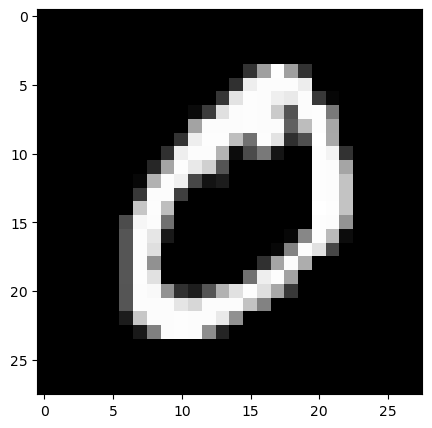

In [88]:
plt.figure(figsize = (5,5))
plt.imshow(x_train[1], cmap = 'gray')

In [89]:
def visualize_im(data):
    plt.figure(figsize=(5,5))
    for n in range(10):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(data[n], cmap='gray')
        plt.axis('off')

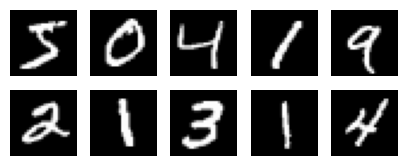

In [90]:
visualize_im(x_train)

In [91]:
x_train[2].shape

(28, 28)

In [92]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

Buraya bakıtıgmızda x_train 2 mizdeki gorselin pixellerinin değerlerini bir dizi oalrak tutugunu görüyoruz

In [93]:
x_train[2][14,10]  # Burda satır ve sutununu verip direk o pixeldeki değeri görüyoz


49

In [94]:
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [95]:
x_train[2][14:20, 10:20].mean()  #Belilir bir bölgenin değelrini aldık ve ortalamsına baktik

96.51666666666667

Pixel değlerini resim üzerinde Görselleştirmek için:

In [96]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    width, height = img.shape

    threshold = img.max() / 2.5

    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x), color = 'white' if img[x][y]<threshold else 'black')

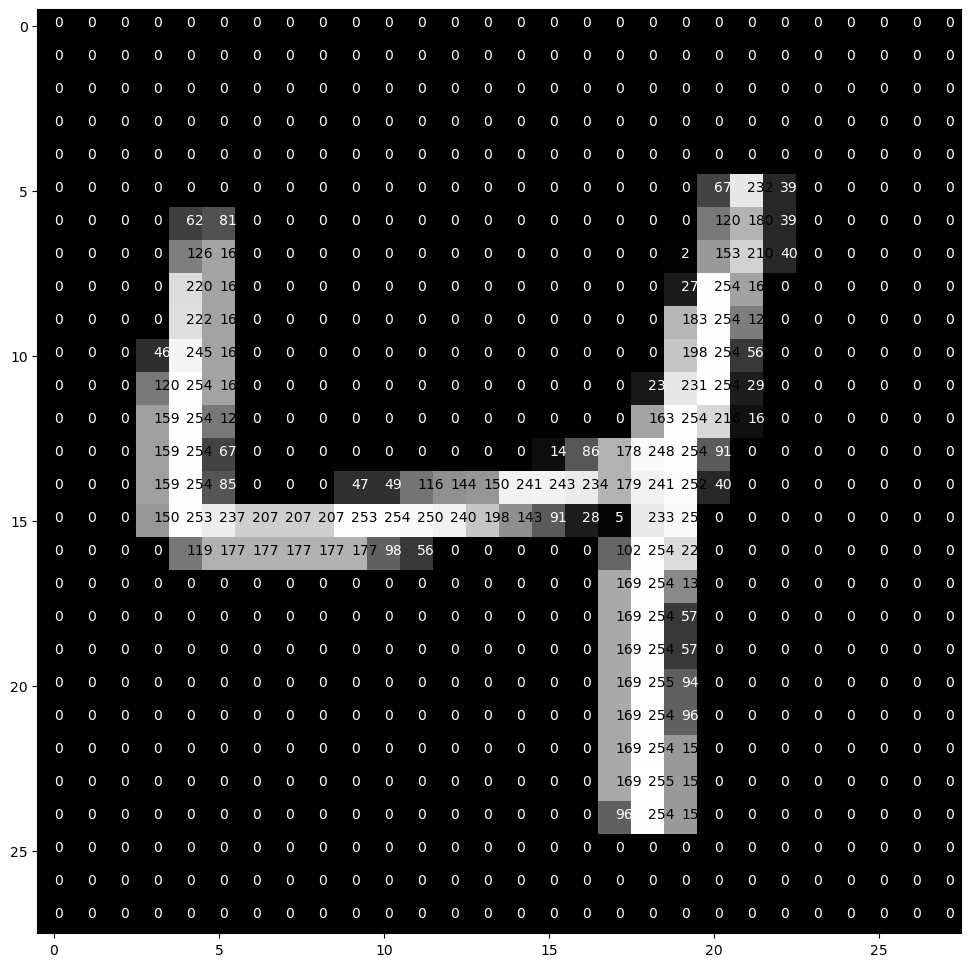

In [97]:
pixel_visualize(x_train[2])

• Encoding: Kategorik verileri sayısal verilere dönüştürür.

In [98]:
y_train[0:4]

array([5, 0, 4, 1], dtype=uint8)

In [99]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [100]:
y_train[0:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

• Reshaping: Verinin boyutunu veya şeklini uygun hale getirir.

In [101]:
image_size = y_train.shape[1]

In [102]:
image_size

10

In [103]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [104]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)



Derin öğrenme modelinin doğru çalışabilmesi için verinin belirli bir şekle (boyuta) sahip olması gerekir. Örneğin, bir görüntü verisi genellikle 2D bir matris (yükseklik x genişlik) biçimindedir, ancak bazı modellerin bu veriyi 1D (tek bir vektör) olarak alması gerekir

 Örnek:
MNIST veri setinde her bir görüntü 28x28 piksel boyutlarında bir resimdir. Ancak, bu görüntüleri bir modelin girdi katmanına uygun hale getirmek için, genellikle bu görüntüler 1D bir vektöre dönüştürülür.

Standardization

In [105]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# Burdaki temel amaç pixelelri 0 ile 255 arasında tutmak yerine
# 0 ile 1 arasında tutmaktır. Performansı etkileyen bi durum

MODELLEME

model=Sequential .... flatten.. dense için: 

• Sequential ile sıralı katman yapmaay çalişiyoz\
•  Flattende yapay sinir ağımzıı kuracagımzı 1. ktmanımız\
• 2. Katmanda activation için relu yaptık ki sönümelnirme görevi de yapsın\
•  units 128 default oalrak yazdık ki genelde bu yazılır\
• 3 katamnda çıkış katmanı oalrka aliyoz 10 tane nöron var çıkışımızda 10 sayı vardı veride ya\
• Activasyonda Softmax kullanmamizin sebebi çok sınıfımızın odlugudur. Eğer 2 sınıf olsaydı sigmoit kullanılırdı


In [106]:
model = Sequential([Flatten(input_shape=(28,28,1)),
                    Dense(units=128, activation='relu', name='layer1'),
                    Dense(units=num_labels, activation='softmax', name= 'output_layer')
                    ])

model.compile için: \
    • Modelimizde hata değerlendirme metriğimizdir "loss", "categor_crossentropy"   yapamamızın sebebi birden fazla sinıfımızın oldugu ve ona gore kensisini ayarlıcagını tanımlıyozruz\
    • Optimize ediceğimiz kayıp fonkisyonalrını optimizerde yapıyoruz\
    • Optimazır da "adam" kullandık\
    • Loss fonksiyonunu minimize ederkn gidiş yönümzü de hata metrkilerine bakarak ilerleriz\
    • Modelin özellikerini vermiş olduk compiler sayesinde

In [107]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[Precision(), Recall(),'accuracy'])

In [108]:
model.summary() # kurdugumuz modelin ozeti

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

model.fit için:
* Epocs kaç tur döneceğini verdik
* Batch_size ile gradiant hesapalarında veri setindeki bütün gözlem birimleriin her epocsta göz önunde bulundurusun yoksa burdan belirli bir alt kume secelim rastgele bu alt kuem uzerinden ağırlık guncellemelrim gerçekleşsin dediğimiz şey oluyor batch_size.
* 128 tane gözlem birimne odaklanarak ilgili optimizasyon biirmien dayalı olarak garadiantlar türeve hesaplanılacak ve bir sonraki epoca geçilecek.


In [109]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8251 - loss: 0.6154 - precision_2: 0.9332 - recall_2: 0.7024 - val_accuracy: 0.9449 - val_loss: 0.1900 - val_precision_2: 0.9606 - val_recall_2: 0.9346
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9497 - loss: 0.1802 - precision_2: 0.9629 - recall_2: 0.9372 - val_accuracy: 0.9596 - val_loss: 0.1367 - val_precision_2: 0.9684 - val_recall_2: 0.9511
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9650 - loss: 0.1239 - precision_2: 0.9740 - recall_2: 0.9576 - val_accuracy: 0.9668 - val_loss: 0.1087 - val_precision_2: 0.9732 - val_recall_2: 0.9619
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9722 - loss: 0.0969 - precision_2: 0.9781 - recall_2: 0.9673 - val_accuracy: 0.9711 - val_loss: 0.0975 - val_precision_2: 0.9768 - val_recall_2: 0.9669
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9771 - loss: 0.0767 - precision_2: 0.9819 - recall_2: 0.9733 -

model.fit() fonksiyonu, eğitim sırasında aşağıdaki gibi bazı metrikleri döndürür:\
 • loss: Eğitim verisi üzerindeki kayıp.\
 • accuracy: Eğitim verisi üzerindeki doğruluk.  Accuracy = (Doğru tahminler / Toplam örnek sayısı)\
 • val_loss: Doğrulama verisi üzerindeki kayıp.\
 • val_accuracy: Doğrulama verisi üzerindeki doğruluk.\

In [111]:
print("Eğitim Kayıp:", history.history['loss']) 
print("Eğitim Doğruluğu:", history.history['accuracy']) 
print("Doğrulama Kayıp:", history.history['val_loss']) 
print("Doğrulama Doğruluğu:", history.history['val_accuracy'])

Eğitim Kayıp: [0.3608608543872833, 0.16493308544158936, 0.11866120249032974, 0.09255773574113846, 0.07443169504404068, 0.06177392229437828, 0.0517503060400486, 0.043369852006435394, 0.036582376807928085, 0.031596601009368896]
Eğitim Doğruluğu: [0.8984500169754028, 0.9529833197593689, 0.9661666750907898, 0.9736999869346619, 0.9785333275794983, 0.9822499752044678, 0.9850666522979736, 0.9877333045005798, 0.9896000027656555, 0.9914500117301941]
Doğrulama Kayıp: [0.19002456963062286, 0.1366816759109497, 0.10870926827192307, 0.0974896028637886, 0.09080733358860016, 0.08290868252515793, 0.08170438557863235, 0.07640872895717621, 0.07923460006713867, 0.07385201007127762]
Doğrulama Doğruluğu: [0.9448999762535095, 0.9595999717712402, 0.9667999744415283, 0.9710999727249146, 0.9728000164031982, 0.9742000102996826, 0.9749000072479248, 0.9775000214576721, 0.9758999943733215, 0.9782999753952026]


EVALUATION(Model Başarısının Değerlendirilmesi)

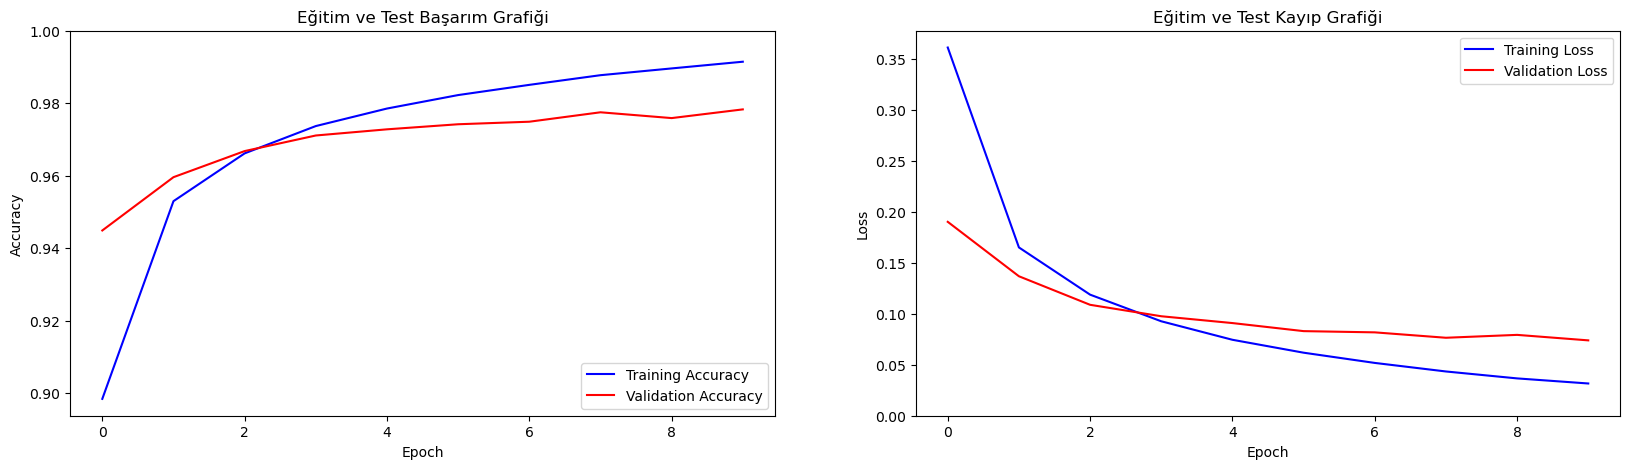

In [117]:
# Grafik 1
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color= 'b', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color ='r', label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği')
# Grafik 2
plt.subplot(1,2,2)
plt.plot(history.history['loss'],color= 'b', label = 'Training Loss')
plt.plot(history.history['val_loss'], color ='r', label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, max(plt.ylim()))
plt.title('Eğitim ve Test Kayıp Grafiği')
plt.show()

In [118]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose= False)

In [119]:
print('\nTest Accuracy: %.1f%%'%(100.0*acc))
print('\nTest Loss: %.1f%%'%(100.0*loss))
print('\nTest Precision: %.1f%%'%(100.0*precision))
print('\nTest Recall: %.1f%%'%(100.0*recall))


Test Accuracy: 97.8%

Test Loss: 7.4%

Test Precision: 98.0%

Test Recall: 97.7%


In [120]:
'''
	model.evaluate() Fonksiyonu
		Bu fonksiyon, eğitim veya test verisi üzerinde modelin kayıp fonksiyonunu ve belirlediğiniz metrikleri hesaplar. Örneğin, doğruluk (accuracy), kesinlik (precision), geri çağırma (recall) gibi metrikler modelin değerlendirilmesi için sıklıkla kullanılır.
		• Verbose için
			§ verbose=0: Herhangi bir çıktı gösterilmez. Yani işlem sessizce yapılır.
			§ verbose=1: Eğitim veya değerlendirme sürecindeki ilerlemeyi gösteren bir çubuk (progress bar) ile çıktı verir.
			§ verbose=2: Her bir epoch'un sonunda, modelin kayıp (loss) ve metriklerinin (accuracy, precision, vb.) çıktısını yazdırır.
		• F1 skoru, kesinlik(precision) ve geri çağırma(recall) metriklerinin birleştirilmesiyle elde edilir.
			§ Bu metrik, dengesiz veri setlerinde veya özellikle pozitif sınıfların doğru tahmin edilmesinin önemli olduğu durumlarda faydalıdır.
			§ F1 skoru 1'e ne kadar yakınsa, model o kadar iyi bir performans sergiliyor demektir. 0'a yaklaştıkça modelin performansı zayıftır.
		• Kesinlik (Precision): Modelin pozitif olarak tahmin ettiği değerlerin ne kadarının doğru olduğunu gösterir.
Precision=True Positives / (True Positives+False Positives)
			§ 
		• Geri Çağırma (Recall): Modelin doğru tahmin ettiği pozitif örneklerin, toplam gerçek pozitif örneklere oranıdır.
Recall=True Positives / (True Positives+False Negatives)
		
		• F1 skoru, kesinlik ve geri çağırma metriklerinin harmonik ortalaması olarak hesaplanır:
		F1 Score=2×((Precision×Recal)/(Precision+Recall))
			§ Precision (Kesinlik) yüksekse, modelin pozitif sınıflarını doğru tahmin etme oranı yüksektir.
Recall (Geri Çağırma) yüksekse, modelin tüm gerçek pozitif örnekleri yakalama oranı yüksektir
'''

"\n\tmodel.evaluate() Fonksiyonu\n\t\tBu fonksiyon, eğitim veya test verisi üzerinde modelin kayıp fonksiyonunu ve belirlediğiniz metrikleri hesaplar. Örneğin, doğruluk (accuracy), kesinlik (precision), geri çağırma (recall) gibi metrikler modelin değerlendirilmesi için sıklıkla kullanılır.\n\t\t• Verbose için\n\t\t\t§ verbose=0: Herhangi bir çıktı gösterilmez. Yani işlem sessizce yapılır.\n\t\t\t§ verbose=1: Eğitim veya değerlendirme sürecindeki ilerlemeyi gösteren bir çubuk (progress bar) ile çıktı verir.\n\t\t\t§ verbose=2: Her bir epoch'un sonunda, modelin kayıp (loss) ve metriklerinin (accuracy, precision, vb.) çıktısını yazdırır.\n\t\t• F1 skoru, kesinlik(precision) ve geri çağırma(recall) metriklerinin birleştirilmesiyle elde edilir.\n\t\t\t§ Bu metrik, dengesiz veri setlerinde veya özellikle pozitif sınıfların doğru tahmin edilmesinin önemli olduğu durumlarda faydalıdır.\n\t\t\t§ F1 skoru 1'e ne kadar yakınsa, model o kadar iyi bir performans sergiliyor demektir. 0'a yaklaştıkç

Kurdugumu modeli kalıcı olarak kaydedicez ve tahmin ettirecez

In [121]:
model.save('mnist_model.h5')

In [125]:
import random

random= random.randint(0, x_test.shape[0])

In [126]:
random

869

In [127]:
test_image = x_test[random]

In [128]:
y_test[random]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

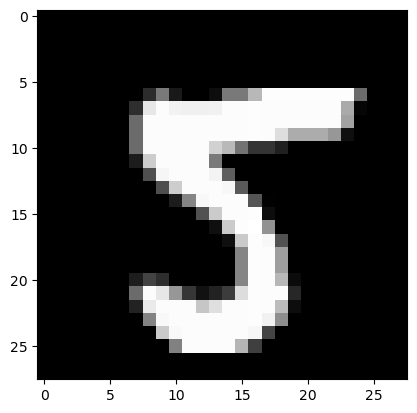

In [129]:
plt.imshow(test_image.reshape(28,28), cmap = 'gray')

tahmin ediyoruz

In [130]:
test_data = x_test[random].reshape(1,28,28,1)
probability = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [131]:
probability

array([[5.9051656e-15, 2.9615889e-15, 3.4376533e-11, 1.0001802e-06,
        6.3040415e-18, 9.9999821e-01, 7.4914549e-20, 2.1280669e-13,
        8.3710000e-07, 1.8564712e-11]], dtype=float32)

In [132]:
predicted_classes = np.argmax(probability)

In [133]:
predicted_classes

5

In [135]:
print(f"Tahmin Edilen Sınıfın {predicted_classes}\n")
print(f"Tahmin Edilen Sınıfın :Olasılık Değeri: {(np.max(probability, axis=1))}\n")
print(f"Tahmin Edilen Sınıfların Olaasılık Değerleri: {probability}")

Tahmin Edilen Sınıfın 5

Tahmin Edilen Sınıfın :Olasılık Değeri: [0.9999982]

Tahmin Edilen Sınıfların Olaasılık Değerleri: [[5.9051656e-15 2.9615889e-15 3.4376533e-11 1.0001802e-06 6.3040415e-18
  9.9999821e-01 7.4914549e-20 2.1280669e-13 8.3710000e-07 1.8564712e-11]]


tahmin başarılı